## Retrieving features with polytope

## Timeseries Example

The following example demonstrates the retrieval of a timeseries using polytope via earthkit-data. It also shows conversion to xarray and visualisation of the time sereis as a meteogram.

In [ ]:
import earthkit.data

LOCATION = ((-9.11, 38.79))

request = {
    "class": "od",
    "stream" : "enfo",
    "type" : "pf",
    "date" : -1,
    "time" : "0000",
    "levtype" : "sfc",
    "expver" : "0001", 
    "domain" : "g",
    "param" : "164/167/169",
    "number" : "1/to/50",
    "step": "0/to/360",
    "feature" : {
        "type" : "timeseries",
        "points": [[LOCATION[0], LOCATION[1]]],
        "axes": "step",
    },
}

ds = earthkit.data.from_source(
    "polytope",
    "ecmwf-mars",
    request,
    stream=False,
    address='polytope.ecmwf.int',
)

The collection being accessed is `ecmwf-mars`. The endpoint being accessed is `polytope.ecmwf.int`.

A user can also convert the data to xarray in the following way:

In [10]:
ds.to_xarray()

<xarray.Dataset> Size: 176kB
Dimensions:   (x: 1, y: 1, z: 1, number: 50, datetime: 1, t: 145)
Coordinates:
  * x         (x) float64 8B -9.104
  * y         (y) float64 8B 38.81
  * z         (z) int64 8B 0
  * number    (number) int64 400B 1 2 3 4 5 6 7 8 9 ... 43 44 45 46 47 48 49 50
  * datetime  (datetime) <U20 80B '2024-11-20T00:00:00Z'
  * t         (t) datetime64[ns] 1kB 2024-11-20 ... 2024-12-05
Data variables:
    tcc       (x, y, z, number, datetime, t) float64 58kB 0.9792 1.0 ... 0.04614
    2t        (x, y, z, number, datetime, t) float64 58kB 296.5 296.2 ... 295.9
    ssrd      (x, y, z, number, datetime, t) float64 58kB 0.0 0.0 ... 3.242e+08
Attributes:
    class:          od
    Forecast date:  2024-11-20T00:00:00Z
    domain:         g
    expver:         0001
    levtype:        sfc
    number:         1
    stream:         enfo
    type:           pf

### Visualise 

The following visualisation uses [earthkit-plots](https://earthkit-plots.readthedocs.io/en/latest/).

<div style="padding: 20px; background-color: #ffdddd; border-left: 6px solid #f44336; margin-bottom: 15px; width: 95%;">
    <strong>Note</strong>: This notebook is rendered in many different ways depending on where you are viewing it (e.g. GitHub, Jupyter, readthedocs etc.). To maximise compatibility with many possible rendering methods, all interactive plots are rendered with <code>chart.show(renderer="png")</code>, which removes all interactivity and only shows a PNG image render.<br><br>
    If you are running this notebook in an interactive session yourself and would like to interact with the plots, remove the <code>renderer="png"</code> argument from each call to <code>chart.show()</code>.
</div>

In [2]:
def location_to_string(location):
    """
    Converts latitude and longitude to a string representation with degrees
    and N/S/E/W.
    """
    (lat, lon) = location
    lat_dir = "N" if lat >= 0 else "S"
    lon_dir = "E" if lon >= 0 else "W"
    return f"{abs(lat):.2f}°{lat_dir}, {abs(lon):.2f}°{lon_dir}"

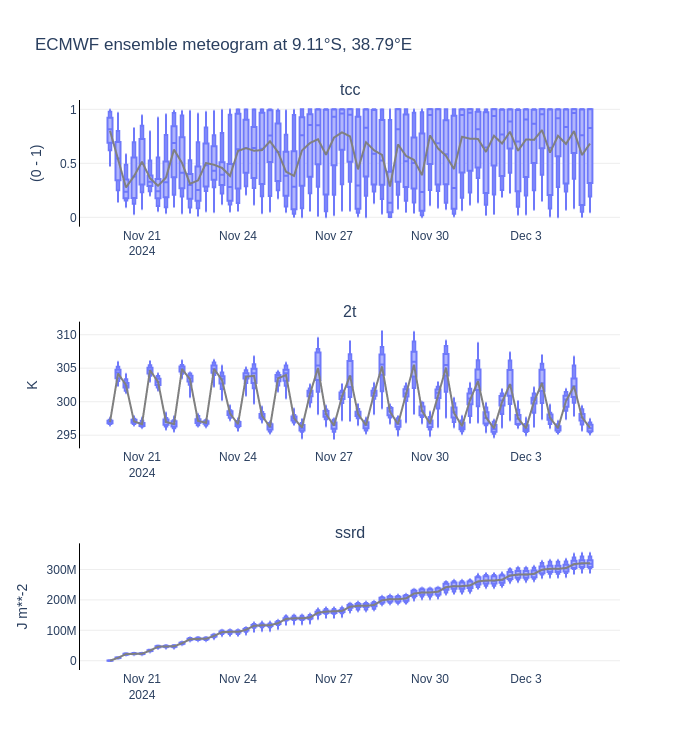

In [3]:
from earthkit.plots.interactive import Chart

TIME_FREQUENCY = "6h"
QUANTILES = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]

chart = Chart()
chart.title(f"ECMWF ensemble meteogram at {location_to_string(LOCATION)}")
chart.box(ds, time_frequency=TIME_FREQUENCY, quantiles=QUANTILES)
chart.line(ds,aggregation='mean', line_color='grey', time_frequency=TIME_FREQUENCY)
chart.show(renderer="png")  # Replace with chart.show() in an interactive session!

## Area Extraction

This example retrieves data using the polygon feature. Here we extract the bounds of Portugal.

In [ ]:
import earthkit.data

request = {
    "class": "od",
    "stream" : "enfo",
    "type" : "pf",
    "date" : -1,  # Note: date must be within the last two days
    "time" : "1200",
    "levtype" : "sfc",
    "expver" : "0001",
    "domain" : "g",
    "param" : "167/169",
    "number" : "1",
    "step": "0",
    "feature": {
        "type": "polygon",
        "shape": [[41.870881288,-8.8791360], [41.694339317422646, -8.824238614026456], [40.171924585721314, -8.902386975546364], [38.75694209400925, -9.493088042617785], [38.42424252381525, -9.171674240710018], [38.49907333213173, -8.676525850529856], [37.057269459205145, -8.971873318897366], [37.162874354643776, -7.406745406502978], [38.19776118392036, -6.931663452624974], [38.4280922170291, -7.321584397020473], [39.011852875635526, -6.9787177479519755], [39.66227871551288, -7.5393956904523804], [39.66568774825791, -7.03915852435145], [40.0019453234905, -6.883203763416162], [40.20373392742229, -7.035724907677206], [40.350463990828985, -6.8135246275213035], [41.030499770212515, -6.905947651233703], [41.593647729084154, -6.22847017956974], [41.67712153119277, -6.544984134823352], [41.949682257268876, -6.567927092516641], [41.96960294343674, -7.1747800681640115], [41.88337981339092, -7.196871678410446], [41.81334515396762,-8.156666519264604], [42.14242723772878, -8.205142297350534], [41.870881288,-8.8791360]],
    },
}

ds = earthkit.data.from_source("polytope", "ecmwf-mars", request, stream=False, address='polytope.ecmwf.int')

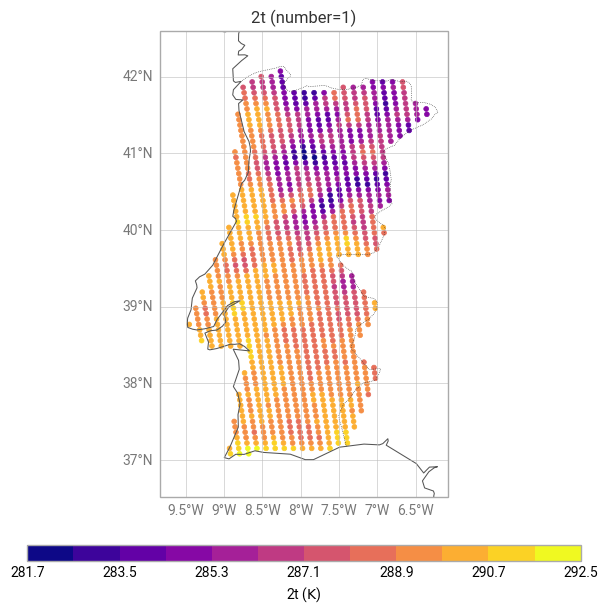

In [5]:
import earthkit.plots

da = ds.to_xarray()
chart = earthkit.plots.Map(domain="Portugal")
chart.point_cloud(da['2t'], x="y", y="x")

chart.coastlines()
chart.borders()
chart.gridlines()

chart.title("{variable_name} (number={number})")

chart.legend()

chart.show()

## Country Cut-Out Example

In [ ]:
import earthkit
import earthkit.plots
import earthkit.geo.cartography

countries = ["France", "Italy", "Spain"] # List of countries

shapes = earthkit.geo.cartography.country_polygons(countries, resolution=50e6)

request = { "class": "od", "stream" : "oper", "type" : "fc", "levtype" : "sfc",
    "date" : 0,
    "time" : 0,
    "expver" : 1,
    "param" : [ 167 ],
    "step": 0,
    "feature": {
        "type": "polygon",
        "shape": shapes,
    },
}

ds = earthkit.data.from_source("polytope", "ecmwf-mars", request, stream=False, address='polytope.ecmwf.int')

In [ ]:
xa = ds.to_xarray()
chart = earthkit.plots.Map(domain=countries)
chart.point_cloud(xa['2t'], x="y", y="x")
chart.coastlines()
chart.borders()
chart.gridlines()
chart.legend()
chart.show()

For further examples of using polytope go to https://polytope.readthedocs.io/en/latest/Service/Examples/examples/